# **Stochastic Gradient Descent**
* Stochastic refers to system or process that are **random** or **probabilistic** in nature.
* In the ML/DL, Stochastic describe algorithms or models that incororate **randomness** in their poerations.
* SGD is an optimization technique (algorithm) used to **minimize the loss function**.To do so, SGD computes the gradient for a **single row, randomly** chosen from the `shuffled training` dataset at each iteration.

> **Import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
def generate_data(n_samples=100,noise=0.1,seed=42):
  np.random.seed(seed)
  X = 2*np.random.randn(n_samples,1)
  y = 4 + 3 * X + noise * np.random.randn(n_samples,1)
  return X,y

In [4]:
X,y = generate_data(n_samples=100,noise=2)

In [5]:
X[:10]

array([[ 0.99342831],
       [-0.2765286 ],
       [ 1.29537708],
       [ 3.04605971],
       [-0.46830675],
       [-0.46827391],
       [ 3.15842563],
       [ 1.53486946],
       [-0.93894877],
       [ 1.08512009]])

In [6]:
y[:10]

array([[ 4.14954343],
       [ 2.32912355],
       [ 7.2007022 ],
       [11.5336246 ],
       [ 2.27250833],
       [ 3.40327997],
       [17.2476487 ],
       [ 8.953764  ],
       [ 1.69825447],
       [ 7.10646843]])

In [7]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (100, 1)
Shape of y: (100, 1)


> Let's plot the generate data distribution

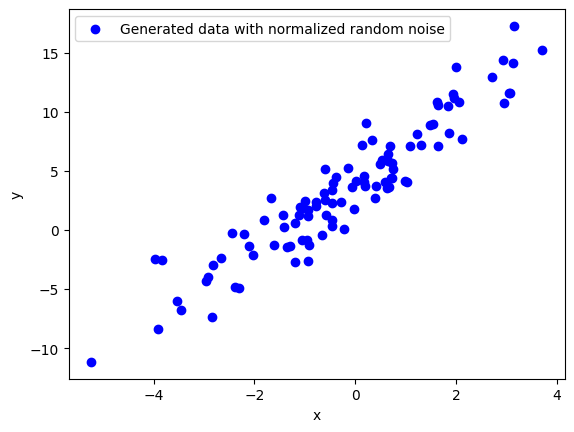

In [8]:
plt.scatter(X,y,color='b',label = 'Generated data with normalized random noise')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

> Adding unit bias term to X

In [10]:
m = len(y)
X_b = np.c_[np.ones((m,1)),X]

In [11]:
X_b[:10]

array([[ 1.        ,  0.99342831],
       [ 1.        , -0.2765286 ],
       [ 1.        ,  1.29537708],
       [ 1.        ,  3.04605971],
       [ 1.        , -0.46830675],
       [ 1.        , -0.46827391],
       [ 1.        ,  3.15842563],
       [ 1.        ,  1.53486946],
       [ 1.        , -0.93894877],
       [ 1.        ,  1.08512009]])

>#### Define `Cost Function`
* Mean Squared Error (MSE)

In [13]:
def compute_cost(X,y,theta):
  m=len(y)
  return np.sum((X.dot(theta)-y)**2)/(2*m)

# Writting `Stochastic Batch Gradient Descent`

In [14]:
def sgd(X,y,theta,alpha=0.1,epochs=100):
  '''
  X = Array of X with the added biases
  y = Vector of y
  theta = Array of weight & biases parameter randomly assigned
  learning rate = alpha value
  epochs = number of times model will run through the entire training dataset
  '''
  m = len(y)
  total_updates = m * epochs
  cost_history = np.zeros(total_updates)
  theta_history = np.zeros((total_updates,theta.shape[0]))


  for epoch in range(epochs):

    for i in range(m):
      index = np.random.randint(m)
      X_i = X[index,:].reshape(1,X.shape[1])
      y_i = y[index].reshape(1,1)

      ####### Compute the gradient for each training row and update the theta
      gradient = (X_i.T.dot(X_i.dot(theta)-y_i))
      theta = theta - alpha * gradient
      cost = compute_cost(X,y,theta)


      cost_history[epoch * m + i] = cost
      theta_history[epoch * m + i] = theta.T
  return theta,cost_history,theta_history

In [19]:
np.random.seed(30)
theta = np.random.randn(2,1)
print(f"theta: {theta}")
#

theta: [[-1.26405266]
 [ 1.52790535]]


# Run SGD Algo

In [20]:
theta_sgd,cost_history_sgd,theta_history_sgd = sgd(X_b,y,theta,alpha=0.1,epochs=100)

In [23]:
cost_history_sgd.shape

(10000,)

In [24]:
theta_history_sgd.shape

(10000, 2)

Text(0.5, 1.0, 'Cost vs Epoch for Stochastic Gradient Descent')

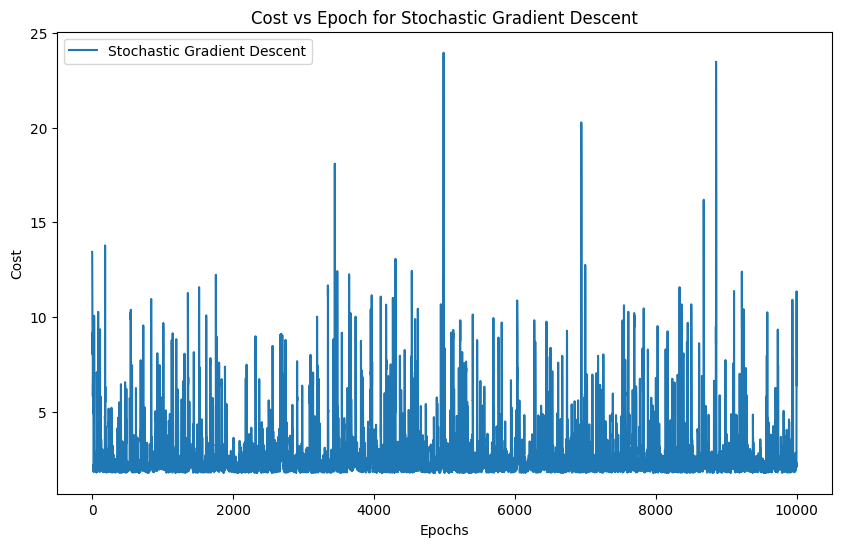

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history_sgd)),cost_history_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs')
plt.legend()
plt.title("Cost vs Epoch for Stochastic Gradient Descent")

> # Let's find best fit linecoming from SGD

In [27]:
x_plot = np.linspace(X.min(),X.max(),100).reshape(100,1)
x_b_plot = np.c_[np.ones((100,1)),x_plot]

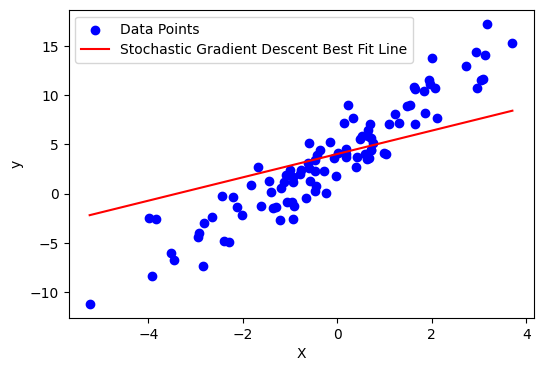

In [28]:
plt.figure(figsize = (6,4))
plt.scatter(X,y, color='blue', label='Data Points')
plt.plot(x_plot, x_b_plot.dot(theta_sgd), color = 'red', label = 'Stochastic Gradient Descent Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()